In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
pop_df = pd.read_csv('Resources/utah population 2000-2022 neilsberg.csv', infer_datetime_format=True, parse_dates=True)
permits_df = pd.read_csv('Resources/UTBP1FH.csv')


/var/folders/_y/yf31rx295k3cwqj5kfdq7xvh0000gn/T/ipykernel_89029/2873642894.py:6: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  pop_df = pd.read_csv('Resources/utah population 2000-2022 neilsberg.csv', infer_datetime_format=True, parse_dates=True)


In [4]:
permits_df['DATE'] = pd.to_datetime(permits_df['DATE'])
permits_df = permits_df.groupby(pd.Grouper(key='DATE', freq='MS')).sum().reset_index()
permits_df = permits_df[permits_df['DATE'] >= '2000-01-01']

permits_df

,DATE,UTBP1FH
144,2000-01-01,944.0
145,2000-02-01,1082.0
146,2000-03-01,1312.0
147,2000-04-01,1343.0
148,2000-05-01,1363.0
...,...,...
427,2023-08-01,1582.0
428,2023-09-01,1211.0
429,2023-10-01,1258.0
430,2023-11-01,1279.0


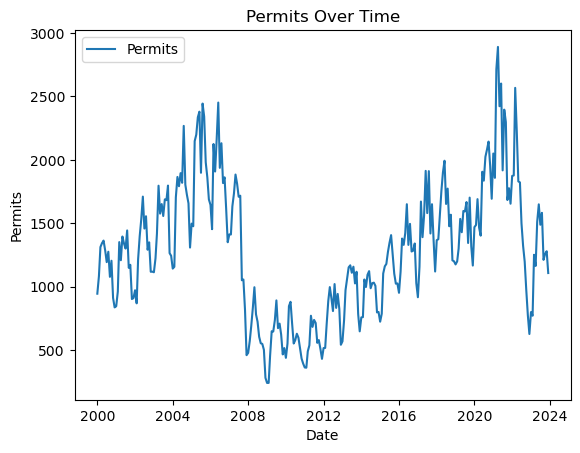

In [5]:
plt.plot(permits_df['DATE'], permits_df['UTBP1FH'], label='Permits')
plt.xlabel('Date')
plt.ylabel('Permits')
plt.title('Permits Over Time')
plt.legend()
plt.show()


In [6]:
pop_df.head()
pop_df.info()
# convert population to int
pop_df['Population'] = pop_df['Population'].str.replace(',', '').astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 23 non-null     int64 
 1   Population           23 non-null     object
 2   Year on Year Change  23 non-null     object
 3   Change in Percent    23 non-null     object
dtypes: int64(1), object(3)
memory usage: 868.0+ bytes


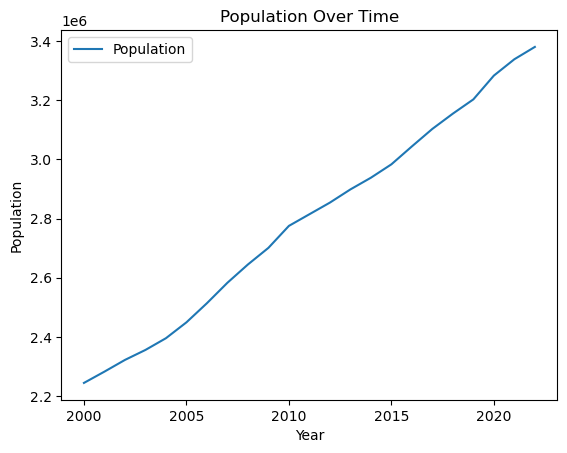

In [7]:
# plot population
plt.plot(pop_df['Year'], pop_df['Population'], label='Population')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over Time')
plt.legend()
plt.show()